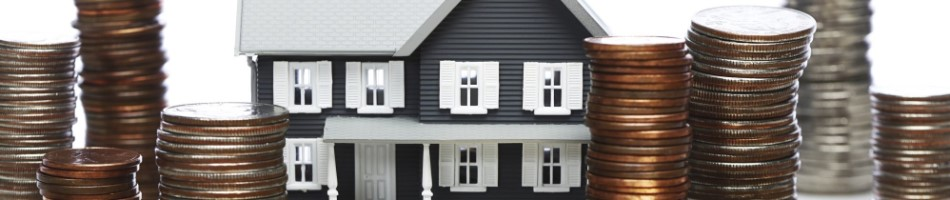

In [ ]:
Bu uygulama KC house  veri setinin

KC House Veri Seti AÇıklama
Bu veri seti, Seattle'ı içeren King County için ev satış fiyatlarını içermektedir. Mayıs 2014 ile Mayıs 2015 arasında satılan evleri kapsar.

Basit regresyon modellerini değerlendirmek için harika bir veri setidir.

Veri Sözlüğü:
- id: Bir ev için bir notasyon
- date: Ev satıldığı tarih
- price: Fiyat, tahmin hedefi
- bedrooms: Yatak odası sayısı
- bathrooms: Banyo sayısı/yatak odası
- sqft_living: Evdeki alanın kare metre cinsinden büyüklüğü
- sqft_lot: Arsanın kare metre cinsinden büyüklüğü
- floors: Evdeki toplam kat sayısı
- waterfront: Su manzaralı ev
- view: Görüntülenmiş mi?
- condition: Genel olarak evin durumu ne kadar iyi
- grade: King County derecelendirme sistemi temelinde konut birimine verilen genel derece
- sqft_above: Bodrum hariç evin kare metre cinsinden büyüklüğü
- sqft_basement: Bodrumun kare metre cinsinden büyüklüğü
- yr_built: Yapım yılı
- yr_renovated: Ev yenilendiği yıl
- zipcode: Posta kodu
- lat: Enlem koordinatı
- long: Boylam koordinatı
- sqft_living15: 2015 yılında oturma odası alanı (bazı yenilemeleri ima eder). Bu, arsa büyüklüğü alanını etkilemiş olabilir veya olmayabilir.
- sqft_lot15: 2015 yılında arsa büyüklüğü (bazı yenilemeleri ima eder).

Kütüphanelerim Yüklenmesi

In [1]:
import pandas as pd

Veri Setinin Yüklenmesi

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is B02C-FD50

 Directory of C:\Users\LENOVO\Documents\BTK\BTK_4.GÜN\Resresyon

11.05.2024  15:24    <DIR>          .
11.05.2024  15:21    <DIR>          ..
11.05.2024  15:17    <DIR>          .ipynb_checkpoints
11.05.2024  11:15             4.063 advertising.csv
11.05.2024  15:24            70.225 KC ev Fiyatları Tahmin.ipynb
11.05.2024  15:15         2.515.206 kc_house_data.csv
11.05.2024  15:14            91.397 Multiple Linear Regresyon.ipynb
11.05.2024  11:15                72 Multiple Linear Regresyon-checkpoint.ipynb
               5 File(s)      2.680.963 bytes
               3 Dir(s)  279.446.183.936 bytes free


In [3]:
df=pd.read_csv("kc_house_data.csv")

Keşifsel Veri Analizi

In [8]:
#pandas sütun sayısını ayarla
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: ylabel='Frequency'>

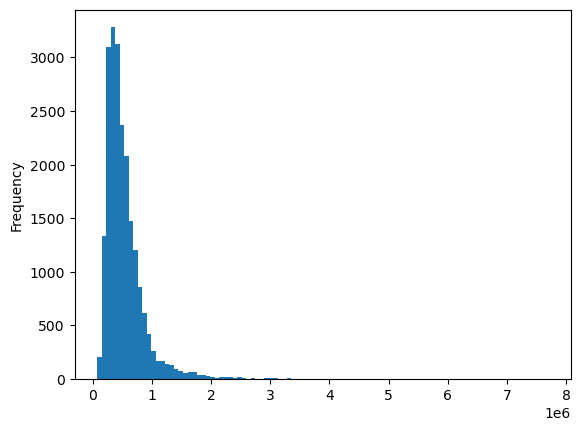

In [14]:
df['price'].plot(kind='hist', bins=100)

In [15]:
# En pahalı ev
df['price'].max()

7700000.0

In [17]:
df[df['price'] == df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [18]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [19]:
df2=df.copy()

In [20]:
# En çok banyo sayısı
df.bathrooms.max()

8.0

In [25]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: >

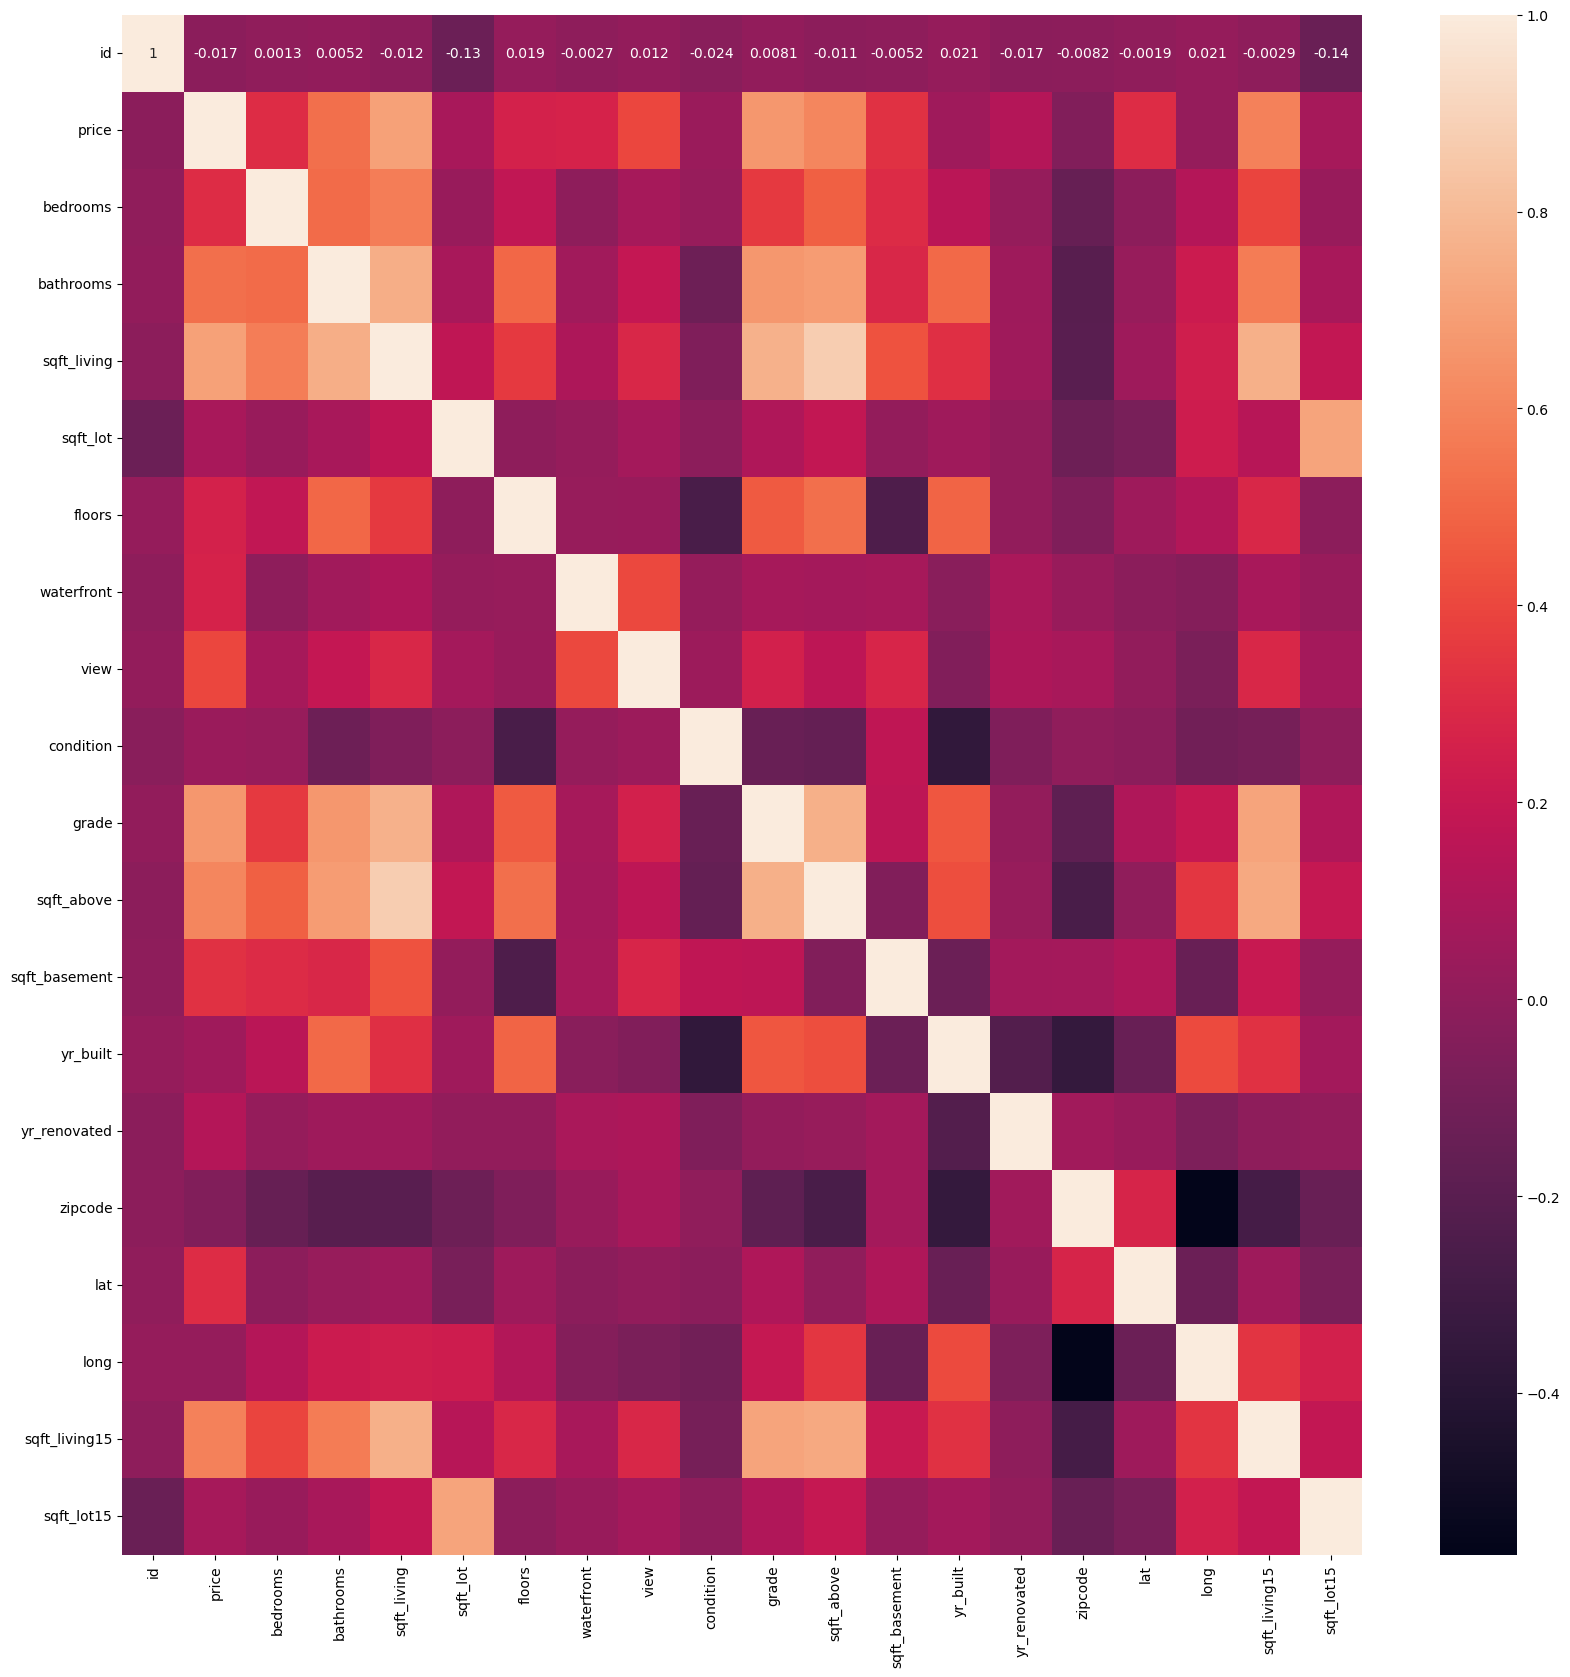

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [29]:
# min banyo sayısı
df.bathrooms.min()

0.0

Normal dağılımda 35d + - verilerin %99.6 sını kapsar.
Geriye kalan % 0.4 ü aykırı değerlerdir.

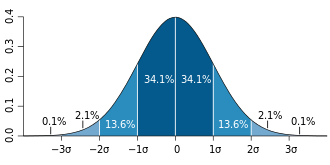

In [38]:
df_bedrooms_outliers=df2[df2['bedrooms']>df2['bedrooms'].mean()+3*df2['bedrooms'].std()]
#df_bedrooms_outliers = df[df['bedrooms'] > df['bedrooms'].mean() + 3 * df['bedrooms'].std()]


In [39]:
df_bedrooms_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,20150105T000000,420000.0,7,3.00,2940,8624,1.0,0,0,3,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623T000000,350000.0,7,3.00,2800,9569,1.0,0,2,3,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,0,3,8,5370,0,1967,0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,20141020T000000,539000.0,7,2.25,2620,6890,2.0,0,0,4,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,3,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125T000000,575000.0,8,3.00,3840,15990,1.0,0,0,3,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


#Min değer için 0.6 çıktığından dolayı (yarım yatak odası)

In [40]:
df_bedrooms_outliers_min=df2[df2['bedrooms']<df2['bedrooms'].mean()-3*df2['bedrooms'].std()]
df_bedrooms_outliers_min

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [41]:
len(df_bedrooms_outliers_min)

13

In [ ]:
#df.drop(df.index[df['bedrooms']<df['bedrooms'].mean()-3*df['bedrooms'].std()].inplace=True

2. Outliers Yöntemi

In [48]:
df_kor=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot']]

In [49]:
outliers2=df_kor.quantile( q=0.99)

In [50]:
outliers2.head()

price          1964400.00
bedrooms             6.00
bathrooms            4.25
sqft_living       4978.80
sqft_lot        213008.00
Name: 0.99, dtype: float64

In [52]:
df3=df2[df2['price']<outliers2['price']]

In [53]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139600e+04,2.139600e+04,21396.000000,21396.000000,21396.000000,2.139600e+04,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000
mean,4.586696e+09,5.181153e+05,3.360909,2.097460,2050.491400,1.499324e+04,1.490512,0.005328,0.216255,3.408254,7.626239,1766.210273,284.281127,1970.989250,82.271593,98078.083333,47.559458,-122.213655,1971.608058,12696.709712
std,2.877291e+09,2.845875e+05,0.923862,0.746921,861.406875,4.097949e+04,0.539255,0.072801,0.729263,0.649551,1.135380,791.592670,430.401009,29.307383,396.793784,53.470361,0.139050,0.141226,668.096205,27203.764165
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124547e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,98033.000000,47.469075,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.575500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.320653e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.054850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10021.250000
max,9.900000e+09,1.960000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [54]:
df3=df3[df3['bedrooms']<outliers2['bedrooms']]

In [55]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108300e+04,2.108300e+04,21083.000000,21083.000000,21083.000000,2.108300e+04,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000
mean,4.589337e+09,5.154680e+05,3.316274,2.083159,2033.658540,1.495866e+04,1.488996,0.005312,0.213395,3.407722,7.621923,1756.632927,277.025613,1971.121045,80.937533,98078.052981,47.559091,-122.213244,1968.303847,12681.053503
std,2.878121e+09,2.827383e+05,0.829420,0.732657,847.645232,4.105184e+04,0.539448,0.072694,0.724074,0.649273,1.134268,785.525479,421.896088,29.288950,393.702090,53.464094,0.139301,0.141618,666.228436,27127.443789
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125049e+09,3.200000e+05,3.000000,1.500000,1410.000000,5.015000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.467800,-122.329000,1480.000000,5100.000000
50%,3.905030e+09,4.475000e+05,3.000000,2.250000,1890.000000,7.566000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.570300,-122.229000,1830.000000,7600.000000
75%,7.334451e+09,6.300000e+05,4.000000,2.500000,2500.000000,1.050500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,530.000000,1997.000000,0.000000,98118.000000,47.678450,-122.124000,2340.000000,10018.000000
max,9.900000e+09,1.960000e+06,5.000000,6.000000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [56]:
df3=df3[df3['bathrooms']<outliers2['bathrooms']]
df3=df3[df3['sqft_living']<outliers2['sqft_living']]
df3=df3[df3['sqft_lot']<outliers2['sqft_lot']]
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.067700e+04,2.067700e+04,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000
mean,4.620621e+09,5.070668e+05,3.306089,2.059329,1999.408183,11692.983605,1.483605,0.005175,0.202157,3.410795,7.590946,1727.406974,272.001209,1970.790927,79.823282,98078.616676,47.559711,-122.215820,1950.999807,11015.414615
std,2.876127e+09,2.712899e+05,0.824975,0.701028,791.098851,18823.502386,0.539096,0.071752,0.704331,0.650487,1.099258,741.313630,412.592495,29.311619,391.094645,53.573133,0.139008,0.140006,646.248225,19121.043368
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.144800e+09,3.175000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469300,-122.330000,1480.000000,5050.000000
50%,3.969300e+09,4.429000e+05,3.000000,2.250000,1870.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1974.000000,0.000000,98070.000000,47.570700,-122.234000,1820.000000,7536.000000
75%,7.348200e+09,6.250000e+05,4.000000,2.500000,2470.000000,10291.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,530.000000,1996.000000,0.000000,98118.000000,47.678900,-122.128000,2320.000000,9890.000000
max,9.900000e+09,1.960000e+06,5.000000,4.000000,4970.000000,212639.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000
